**Problem Description:**

Past studies in Sarcasm Detection mostly make use of Twitter datasets collected using hashtag based supervision but such datasets are noisy in terms of labels and language. Furthermore, many tweets are replies to other tweets and detecting sarcasm in these requires the availability of contextual tweets.                                                                                                                                     
In this hands-on project, the goal is to build a model to detect whether a sentence is sarcastic or not, using Bidirectional LSTMs.                 

**Data Description:**
News Headlines dataset for Sarcasm Detection. The dataset is collected from two news websites, theonion.com and huffingtonpost.com. This new dataset has the following advantages over the existing Twitter datasets:                          
Since news headlines are written by professionals in a formal manner, there are no spelling mistakes and informal usage. This reduces the sparsity and also increases the chance of finding pre-trained embedding.                                           
Furthermore, since the sole purpose of TheOnion is to publish sarcastic news, we get high-quality labels with much less noise as compared to Twitter datasets.                                                                                                                                                                                                  
Unlike tweets that reply to other tweets, the news headlines obtained are self-contained. This would help us in teasing apart the real sarcastic elements                                                                                                   
Content                                                                                                                       
Each record consists of three attributes:                                                                                     
- is_sarcastic: 1 if the record is sarcastic otherwise 0
- headline: the headline of the news article
- article_link: link to the original news article. Useful in collecting supplementary data

### Sarcasm Detection
 **Acknowledgement**

Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

In [2]:
# setting the project path

project_path =  r'C:\\Users\\nagarc1\\Documents\\GreatLakes\\NLP\\Week 6 Project\\'

In [2]:
# importing the basic libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#**## Reading and Exploring Data**

### Read Data "Sarcasm_Headlines_Dataset.json", exploring the data and get  some insights about the data.

In [3]:
# read the datafile 

df = pd.read_json('Sarcasm_Headlines_Dataset.json', lines=True)
df.head() 

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


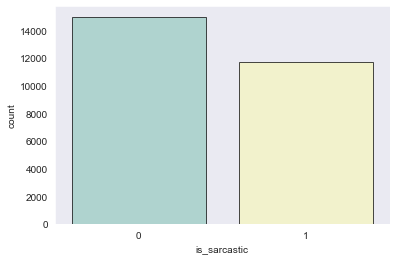

In [4]:
# getting the counts of two classes i.e sarcastic and non-sarcastic 

sns.set_style('dark')
sns.countplot(df.is_sarcastic, palette="Set3", edgecolor = 'black', alpha = 0.7)

plt.show()

> Data is mostly balanced

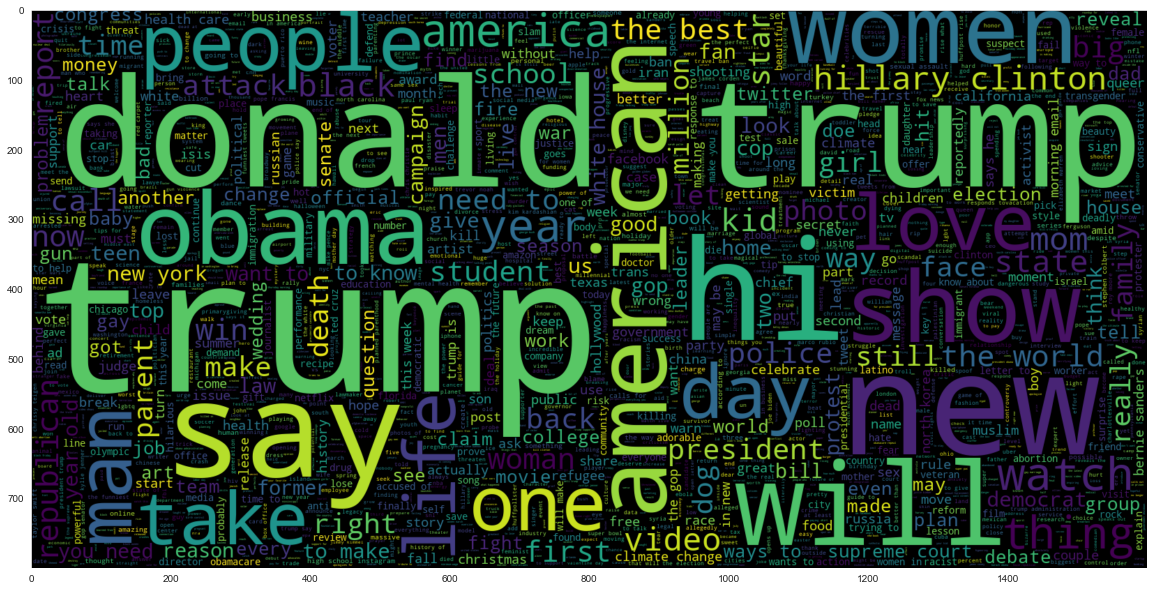

In [5]:
# wordcloud for text that is non-sarcastic 

from wordcloud import WordCloud

plt.figure(figsize = (20,20)) # Text that is Not Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.is_sarcastic == 0].headline))
plt.imshow(wc , interpolation = 'bilinear')

plt.show()

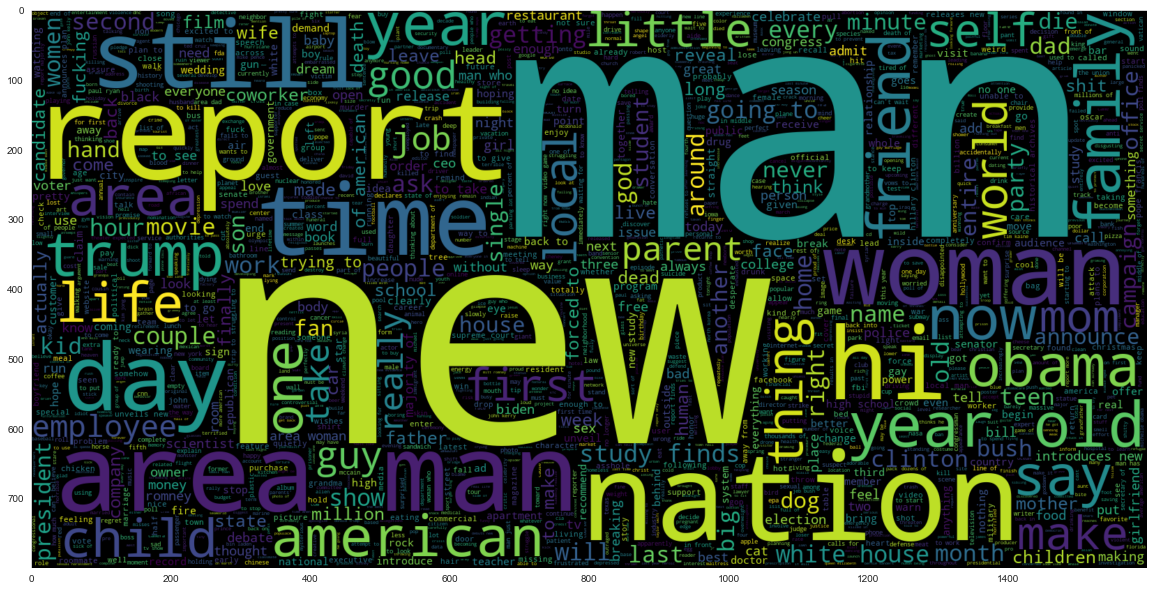

In [6]:
# wordcloud for text that is sarcastic 

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.is_sarcastic == 1].headline))
plt.imshow(wc , interpolation = 'bilinear')

plt.show()

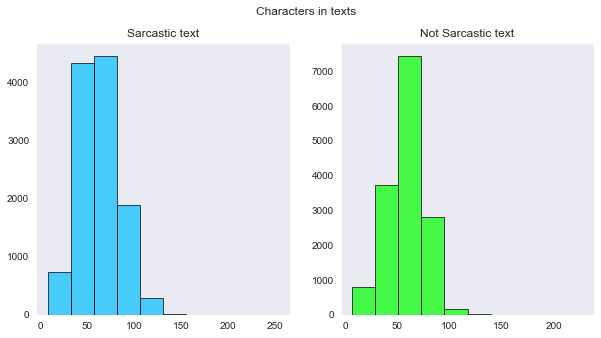

In [7]:
# getting the number of charectors in texts for 'headline column'

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df[df['is_sarcastic']==1]['headline'].str.len()
ax1.hist(text_len,color='deepskyblue', edgecolor = 'black', alpha = 0.7)
ax1.set_title('Sarcastic text')
text_len=df[df['is_sarcastic']==0]['headline'].str.len()
ax2.hist(text_len,color='lime',edgecolor = 'black', alpha = 0.7)
ax2.set_title('Not Sarcastic text')
fig.suptitle('Characters in texts')
plt.show()

> charectors in not sarcastic text are very much higher compared to sarcastic text  

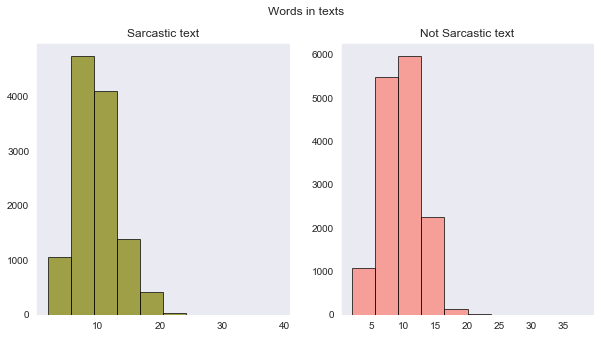

In [8]:
# getting the words in texts for 'headline column'

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df[df['is_sarcastic']==1]['headline'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='olive',edgecolor = 'black', alpha = 0.7)
ax1.set_title('Sarcastic text')
text_len=df[df['is_sarcastic']==0]['headline'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='salmon',edgecolor = 'black', alpha = 0.7)
ax2.set_title('Not Sarcastic text')
fig.suptitle('Words in texts')
plt.show()

> words in not sarcastic text are higher compared with sarcastic text 

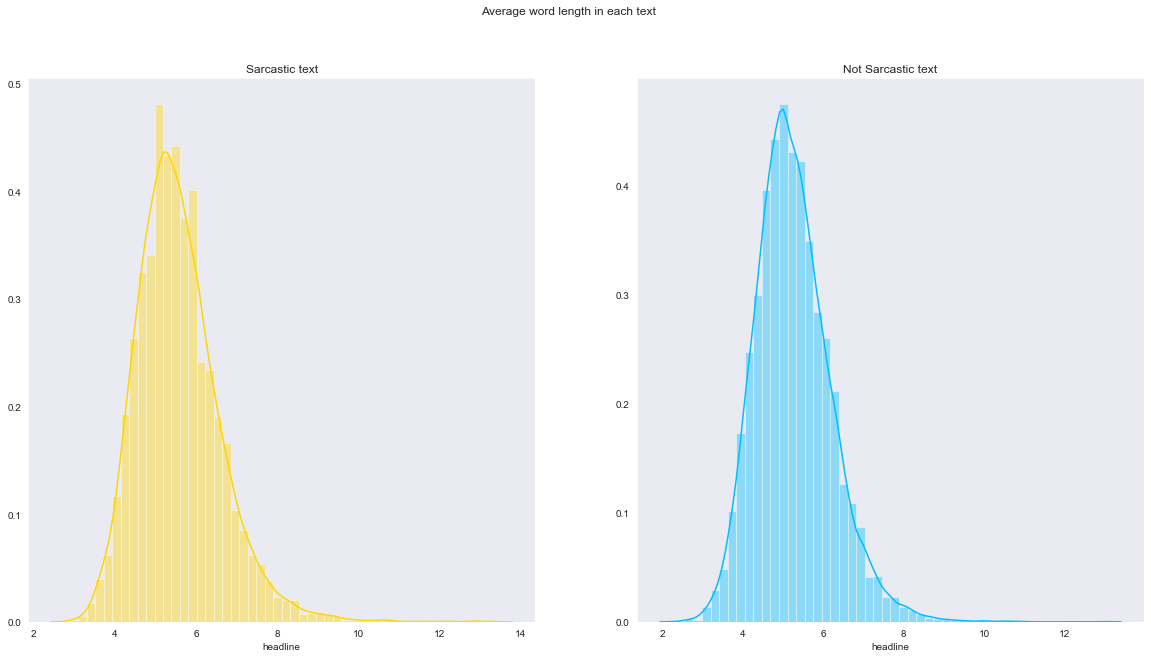

In [9]:
# comparing the average word length between sarcastic vs not sarcastic text 

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=df[df['is_sarcastic']==1]['headline'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='gold')
ax1.set_title('Sarcastic text')
word=df[df['is_sarcastic']==0]['headline'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='deepskyblue')
ax2.set_title('Not Sarcastic text')
fig.suptitle('Average word length in each text')
plt.show()

> average word length seems to be mostly same betweent the two classes 

**As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.**

In [10]:
df = df[['headline', 'is_sarcastic']]
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


> dropping the 'article_link' column which might not contribute for our analysis 

**As different lines are of different length. We need to pad the our sequences using the max length.**

In [11]:
df['len'] = df['headline'].apply(lambda x: len(x.split(" ")))
df.head()

,headline,is_sarcastic,len
0,former versace store clerk sues over secret 'b...,0,12
1,the 'roseanne' revival catches up to our thorn...,0,14
2,mom starting to fear son's web series closest ...,1,14
3,"boehner just wants wife to listen, not come up...",1,13
4,j.k. rowling wishes snape happy birthday in th...,0,11


> the length of the sarcastic text seems to be higher 

In [12]:
# getting the maximum length of the line 

print('Maximum length: ', df['len'].max())

Maximum length:  39


#**## Modelling**

### Import required modules required for modelling.

In [13]:
# importing the libraries required for the model 

import tensorflow.keras as keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

### Setting the necessary Parameters for the model.

In [14]:
max_features = 10000
maxlen = 20
embedding_size = 200

### Applying Keras Tokenizer of headline column of your data.

In [15]:
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(list(df['headline']))

> fitting the 'headline' column to tokenizer instance. Basically we are creating tokens for 'headline' column of the dataset

### Define X and y for your model.

In [16]:
X = tokenizer.texts_to_sequences(df['headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(df['is_sarcastic'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 26709
[   0    0    0    0    0    0    0    0    0    0  307  678 3336 2297
   47  381 2575    5 2576 8433]
Number of Labels:  26709
0


### Get the Vocabulary size

In [17]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

29657


#**## Word Embedding**

### Get Glove Word Embeddings

In [18]:
glove_file = project_path + "glove.6B.zip"

In [19]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

### Get the Word Embeddings using Embedding file as given below.

In [20]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE, encoding='utf8'):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

### Create a weight matrix for words in training docs

In [21]:
embedding_matrix = np.zeros((vocab_size, 200))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

### Create and Compile your Model

In [22]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_size, weights = [embedding_matrix]))
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['acc'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 200)         5931400   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 256)         336896    
_________________________________________________________________
dense (Dense)                (None, None, 1)           257       
Total params: 6,268,553
Trainable params: 6,268,553
Non-trainable params: 0
_________________________________________________________________


### Fit your model

In [24]:
batch_size = 100
epochs =5

history = model.fit(X, y, batch_size = batch_size , epochs = epochs, validation_split=0.2)

Train on 21367 samples, validate on 5342 samples
Epoch 1/5
21367/21367 [==============================] - 44s 2ms/sample - loss: 0.3777 - acc: 0.8295 - val_loss: 0.3194 - val_acc: 0.8657
Epoch 2/5
21367/21367 [==============================] - 38s 2ms/sample - loss: 0.1711 - acc: 0.9321 - val_loss: 0.3757 - val_acc: 0.8581
Epoch 3/5
21367/21367 [==============================] - 39s 2ms/sample - loss: 0.0829 - acc: 0.9697 - val_loss: 0.5290 - val_acc: 0.8510
Epoch 4/5
21367/21367 [==============================] - 39s 2ms/sample - loss: 0.0430 - acc: 0.9847 - val_loss: 0.6401 - val_acc: 0.8521
Epoch 5/5
21367/21367 [==============================] - 39s 2ms/sample - loss: 0.0227 - acc: 0.9924 - val_loss: 0.7769 - val_acc: 0.8489


> fitting the train and test data to the model and getting results for 3 epochs. Model scores validation accuracy of 84.60% 

In [25]:
pred = model.predict_classes(y)
pred[:5]

array([[[0]],

       [[0]],

       [[1]],

       [[1]],

       [[0]]])

> sample 5 predictions 

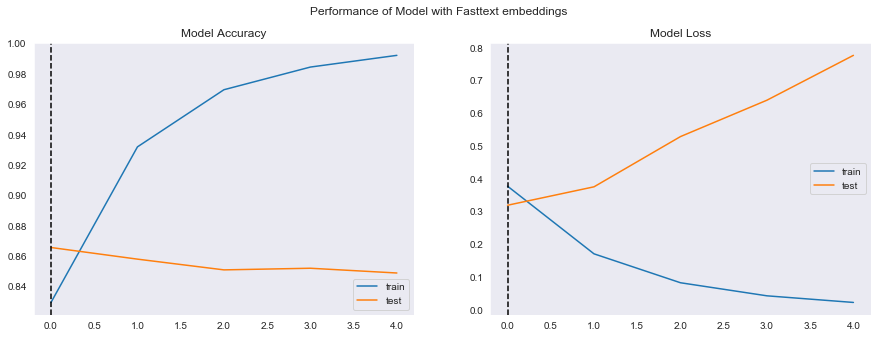

In [26]:
# getting the graph for model accuracy and the loss 

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fig.suptitle("Performance of Model with Fasttext embeddings")
ax1.plot(history.history['acc'])
ax1.plot(history.history['val_acc'])
vline_cut = np.where(history.history['val_acc'] == np.max(history.history['val_acc']))[0][0]
ax1.axvline(x=vline_cut, color='k', linestyle='--')
ax1.set_title("Model Accuracy")
ax1.legend(['train', 'test'])

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
vline_cut = np.where(history.history['val_loss'] == np.min(history.history['val_loss']))[0][0]
ax2.axvline(x=vline_cut, color='k', linestyle='--')
ax2.set_title("Model Loss")
ax2.legend(['train', 'test'])
plt.show()

**Conclusion:**
> overall we sucessfully built a model which can classify the text into two classes: sarcastic and not sarcastic               
> we were able to achive a good score of 84.60%